In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import glob
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = 'drive/MyDrive/work_with_ML/VanyaProj/'

In [4]:
def mask_creating(img_path):
  img = cv2.imread(img_path)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  lower_yellow = np.array([25, 50, 180])
  upper_yellow = np.array([35, 255, 255])

  lower_blue = np.array([110, 50, 180]) 
  upper_blue = np.array([130, 255, 180])

  lower_turq = np.array([85, 50, 180])
  upper_turq = np.array([95, 255, 255])

  lower_pink = np.array([145, 50, 180])
  upper_pink = np.array([155, 255, 255])

  mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)/255
  mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)/255
  mask_turq = cv2.inRange(hsv, lower_turq, upper_turq)/255
  mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)/255

  return np.asarray([mask_yellow, mask_blue, mask_turq, mask_pink])

In [5]:
import matplotlib.pyplot as plt

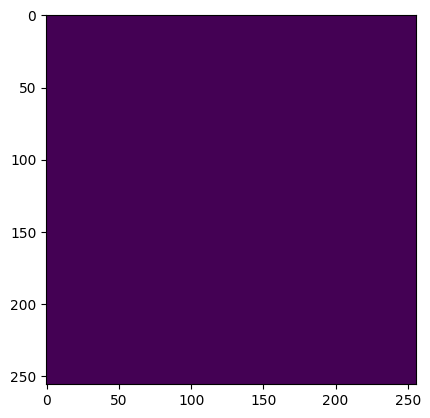

In [8]:
masks = mask_creating(path+"DATA/training/y/2673.png")
plt.imshow(masks[1])

In [7]:
len(os.listdir(path+"DATA/training/x"))

2741

In [8]:
x_path = glob.glob(path+"DATA/training/x/*.png")
y_path = glob.glob(path+"DATA/training/y/*.png")
len(x_path)

2741

In [9]:
x_path.sort(key = lambda x:x.split("/")[-1].split(".png")[0])
y_path.sort(key = lambda x:x.split("/")[-1].split(".png")[0])

In [10]:
y_namespace = []
for path in y_path:
  y_namespace.append(path.split("/")[-1].split(".")[0])
y_namespace[:5]

['1', '10', '100', '1000', '1001']

In [11]:
x_namespace = []
for path in x_path:
  x_namespace.append(path.split("/")[-1].split(".")[0])
x_namespace[:5]

['1', '10', '100', '1000', '1001']

In [12]:
x_rdy = []
for x in x_namespace:
  if (x in y_namespace):
    x_rdy.append(x)
len(x_rdy)

2676

In [13]:
x_path_rdy = [img for img in x_path if (img.split("/")[-1].split)(".png")[0] in x_rdy]
len(x_path_rdy)

2676

In [ ]:
x_path_rdy[5:]

In [ ]:
y_path[5:]

In [ ]:
i = 0
y = []
for i in range(len(x_path_rdy)):
  cv2.imwrite(path+"DATA/training/input/"+str(i)+".jpg", cv2.imread(x_path_rdy[i]))
  cv2.imwrite(path+'DATA/training/output/'+str(i)+'.png', cv2.imread(y_path[i]))
  #yellow - 0, blue - 1, turq - 2, pink - 3 
  masks = mask_creating(y_path[i])
  y.append(masks)
  print(i)
#y = np.asarray(y)
    

In [18]:
img = cv2.imread(path+'DATA/training/input/12.jpg')